# Higher winding sectors.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from data_io import retrieve_spectrum_numpy

datadir = '/home/lukas/_temp_FQLM/'

def get_gap_lines(file, n_states=20, ref_gs=None, skip=[]):
    """ Takes a file and returns n_states gaps as function of lambda.
    """
    lams, spectrum = retrieve_spectrum_numpy(file, cutoff=n_states, skip=skip)
    nl = spectrum.shape[0]
    
    if ref_gs is None:
        gs = spectrum[:,0]
    else:
        gs = ref_gs
    
    gaps = []
    for i in range(0, n_states):
        gaps.append((spectrum[:,i]-gs[:nl]).real)
        
    if ref_gs is None:
        return lams, gaps, gs
    return lams, gaps

### Checks for the 2x2x2 system.

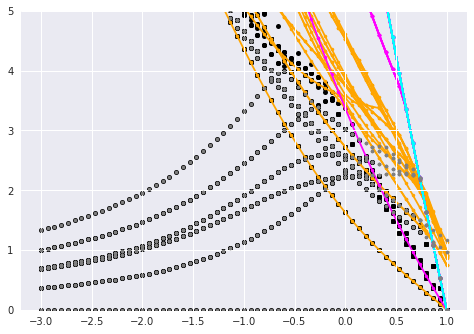

In [56]:
with plt.style.context('seaborn'):
    fig, ax = plt.subplots()
    
    # Full states.
    lams, gaps, gs = get_gap_lines(datadir+'results_bosons_all-ws_2x2x2.hdf5', n_states=50)
    for g in gaps:
        ax.plot(lams, g, color='black', ls='', marker='o', markersize=5, zorder=0)   
    
    # W [0,0,0]
    lams, gaps = get_gap_lines(datadir+'results_bosons_wx_2-wy_2-wz_2_2x2x2.hdf5', ref_gs=gs)    
    for g in gaps:
        ax.plot(lams, g, color='gray', ls='', marker='.')
        
    # W [0,0,1]
    lams, gaps, = get_gap_lines(datadir+'results_bosons_wx_2-wy_2-wz_3_2x2x2.hdf5', ref_gs=gs)    
    for g in gaps:
        ax.plot(lams, g, color='orange', ls='-', marker='.', zorder=0)
#     lams, gaps, = get_gap_lines(datadir+'results_bosons_wx_2-wy_3-wz_2_2x2x2.hdf5', ref_gs=gs)    
#     for g in gaps:
#         ax.plot(lams, g, color='red', ls='', marker='.', zorder=0)
#     lams, gaps, = get_gap_lines(datadir+'results_bosons_wx_3-wy_2-wz_2_2x2x2.hdf5', ref_gs=gs)    
#     for g in gaps:
#         ax.plot(lams, g, color='green', ls='', marker='.', zorder=0)
        
    # W [1,1,1]
#     lams, gaps, = get_gap_lines(datadir+'results_bosons_wx_3-wy_3-wz_3_2x2x2.hdf5', ref_gs=gs)    
#     for g in gaps:
#         ax.plot(lams, g, color='red', ls='-', marker='.', zorder=0)
        
#     # W [1,1,0]
#     lams, gaps, = get_gap_lines(datadir+'results_bosons_wx_3-wy_3-wz_2_2x2x2.hdf5', ref_gs=gs)    
#     for g in gaps:
#         ax.plot(lams, g, color='yellow', ls='-', marker='.', zorder=0)
        
#     # W [2,0,0]
    lams, gaps, = get_gap_lines(datadir+'results_bosons_wx_4-wy_2-wz_2_2x2x2.hdf5', ref_gs=gs)    
    for g in gaps:
        ax.plot(lams, g, color='magenta', ls='-', marker='.', zorder=0)
        
#     # W [2,2,2]
#     lams, gaps, = get_gap_lines(datadir+'results_bosons_wx_4-wy_2-wz_2_2x2x2.hdf5', ref_gs=gs)    
#     for g in gaps:
#         ax.plot(lams, g, color='green', ls='-', marker='.', zorder=0)
        
        
    # W [-1,0,0]
#     lams, gaps, = get_gap_lines(datadir+'results_bosons_wx_1-wy_2-wz_2_2x2x2.hdf5', ref_gs=gs)    
#     for g in gaps:
#         ax.plot(lams, g, color='cyan', ls='', marker='.', zorder=0)

    # W [-1,0,1]
#     lams, gaps, = get_gap_lines(datadir+'results_bosons_wx_1-wy_2-wz_3_2x2x2.hdf5', ref_gs=gs)    
#     for g in gaps:
#         ax.plot(lams, g, color='cyan', ls='', marker='.', zorder=0)
        
#     W [-2,0,2]
    lams, gaps, = get_gap_lines(datadir+'results_bosons_wx_0-wy_2-wz_4_2x2x2.hdf5', ref_gs=gs, n_states=5)    
    for g in gaps:
        ax.plot(lams, g, color='cyan', ls='-', marker='.', zorder=0)
        
    ax.set_ylim(0,5)

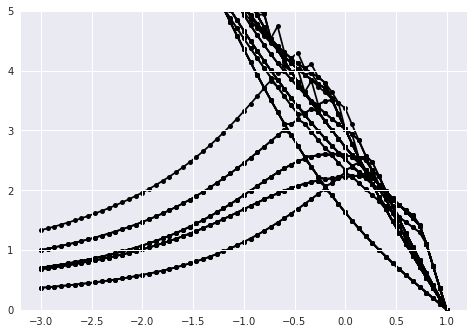

In [24]:
import sys
sys.path.append('../python_gauss_lattice/')
from gl_simulation import GLSimulation
    
with plt.style.context('seaborn'):
    fig, ax = plt.subplots()
    
    
    # Full states.
    lams, gaps, gs = get_gap_lines(datadir+'results_bosons_all-ws_2x2x2.hdf5', n_states=50)    
    for g in gaps:
        ax.plot(lams, g, color='black', ls='-', marker='o', markersize=5, zorder=0)   

    for ws in GLSimulation.winding_sectors([2,2,2], tag=True):
#         if 'wx_2' in ws:
        lams, gaps = get_gap_lines(datadir+'results_bosons_{:s}_2x2x2.hdf5'.format(ws), n_states=50, ref_gs=gs)  
        for g in gaps:
            ax.plot(lams, g, color='red', ls='-', marker='.', zorder=10)
        
    ax.set_ylim(0,5)

## 2x2x4

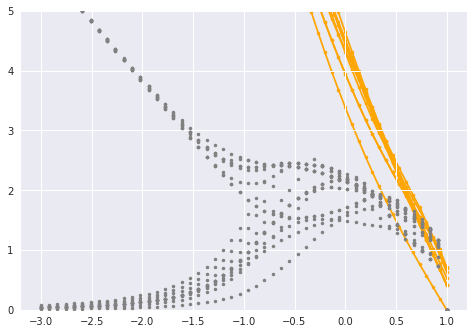

In [18]:
from scipy.interpolate import interp1d

with plt.style.context('seaborn'):
    fig, ax = plt.subplots()
    
    # W [0,0,0]
    lams, gaps, gs = get_gap_lines('../python_data/winding_gaps/multi_spectrum_bosons_wx_4-wy_4-wz_2_2x2x4.dat')
    gs_func = interp1d(lams, gs.real)
    for g in gaps[1:]:
        ax.plot(lams, g, color='gray', ls='', marker='.')
        
#     # W [0,0,1]
    lams, gaps, gs = get_gap_lines('../python_data/winding_gaps/results_bosons_wx_4-wy_4-wz_3_2x2x4.hdf5', n_states=10, skip=['eigenstates'])    
    for g in gaps:
        ax.plot(lams, g+gs.real-gs_func(lams), color='orange', ls='-', marker='.', zorder=0)

    ax.set_ylim(0,5)

### Winding gap.

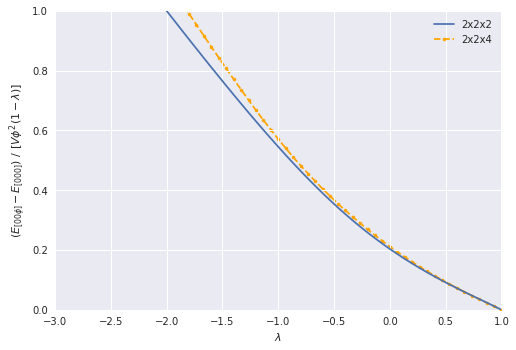

In [63]:
import sys
sys.path.append('../python_gauss_lattice/')
from gl_simulation import GLSimulation
    
    
with plt.style.context('seaborn'):
    fig, ax = plt.subplots()
    
    # --------------------------
    # 2x2x2
    
    # Full states.
    V = 2*2*2
    lams, _, gs = get_gap_lines(datadir+'results_bosons_wx_2-wy_2-wz_2_2x2x2.hdf5', n_states=50)
    
    for phi in [1]:
        lams, gaps = get_gap_lines(datadir+'results_bosons_wx_2-wy_2-wz_{:d}_2x2x2.hdf5'.format(phi+2), n_states=50, ref_gs=gs)  
        y = gaps[0] / V#(phi**2*(1-lams)) / V
        ax.plot(lams, y, label='2x2x2')
   
    # --------------------------
    # 2x2x4
    V = 2*2*4
    phi = 1
    
    lams, gaps, gs = get_gap_lines('../python_data/winding_gaps/multi_spectrum_bosons_wx_4-wy_4-wz_2_2x2x4.dat')
    gs_func = interp1d(lams, gs.real)
    
    lams, gaps, gs = get_gap_lines('../python_data/winding_gaps/results_bosons_wx_4-wy_4-wz_3_2x2x4.hdf5', n_states=10, skip=['eigenstates'])    
    gap = gaps[0]+gs.real-gs_func(lams)
    y = gap /V #(phi**2*(1-lams)) / V
    ax.plot(lams, y, color='orange', ls='--', marker='.', zorder=0, label='2x2x4')
    
    # --------------------------
    
    ax.set_xlabel('$\\lambda$')
    ax.set_ylabel('$(E_{[00\\phi]} - E_{[000]})\ /\ [V \phi^2(1-\\lambda)]$')
    
    ax.legend(loc='upper right')
    ax.set_xlim(-3,1)
    ax.set_ylim(0,1)

### LE states for [0,0,1] sector.